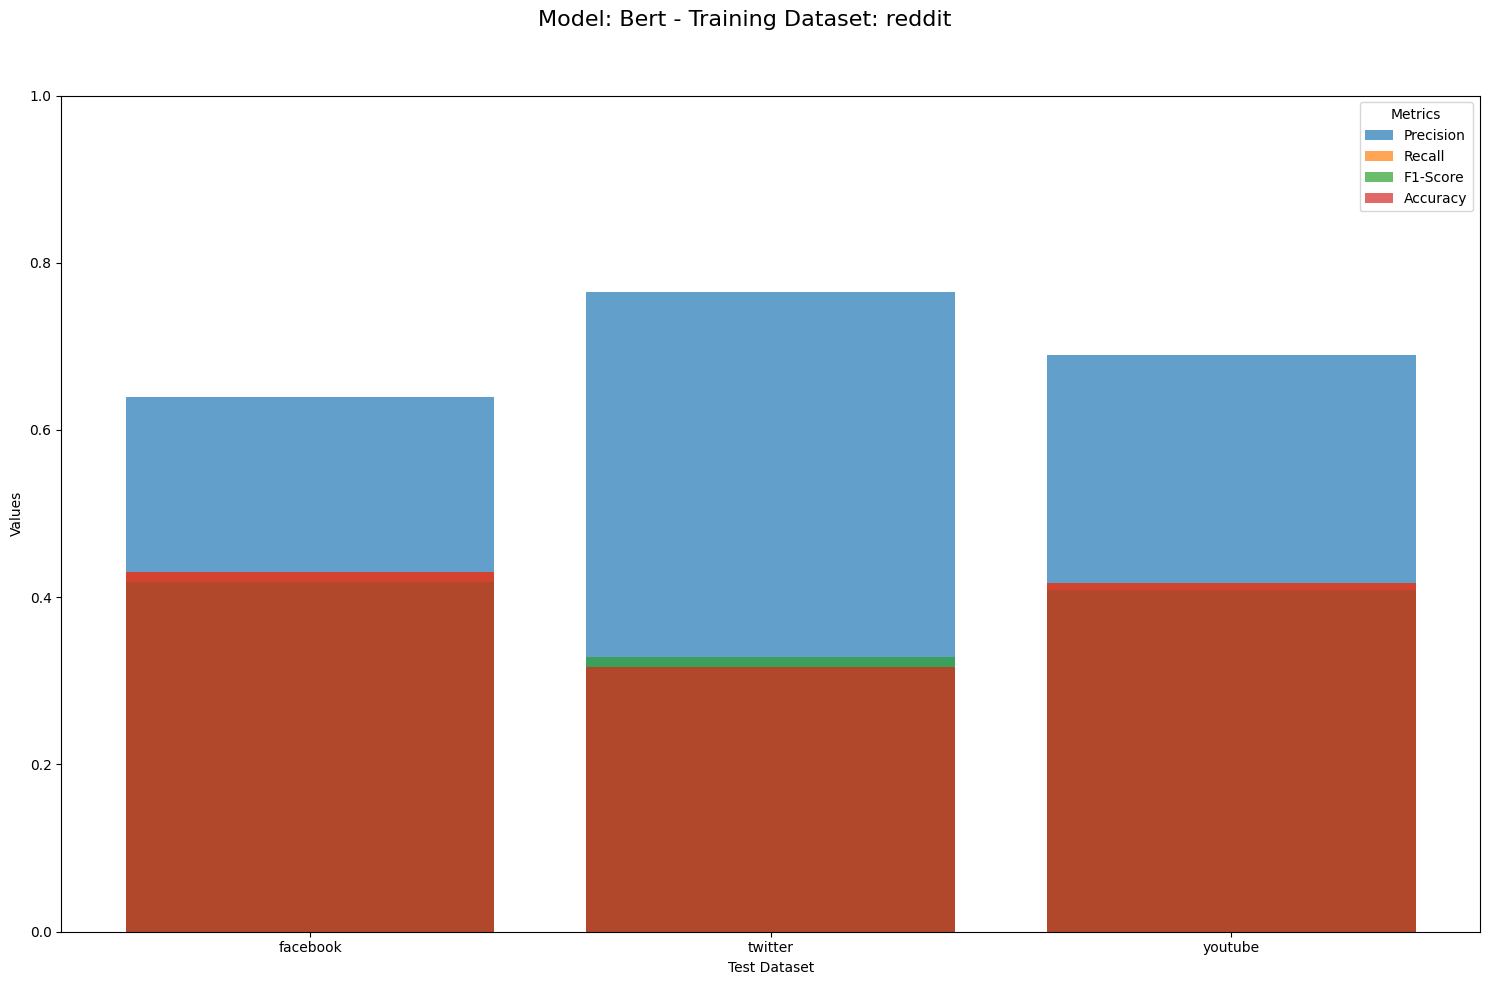

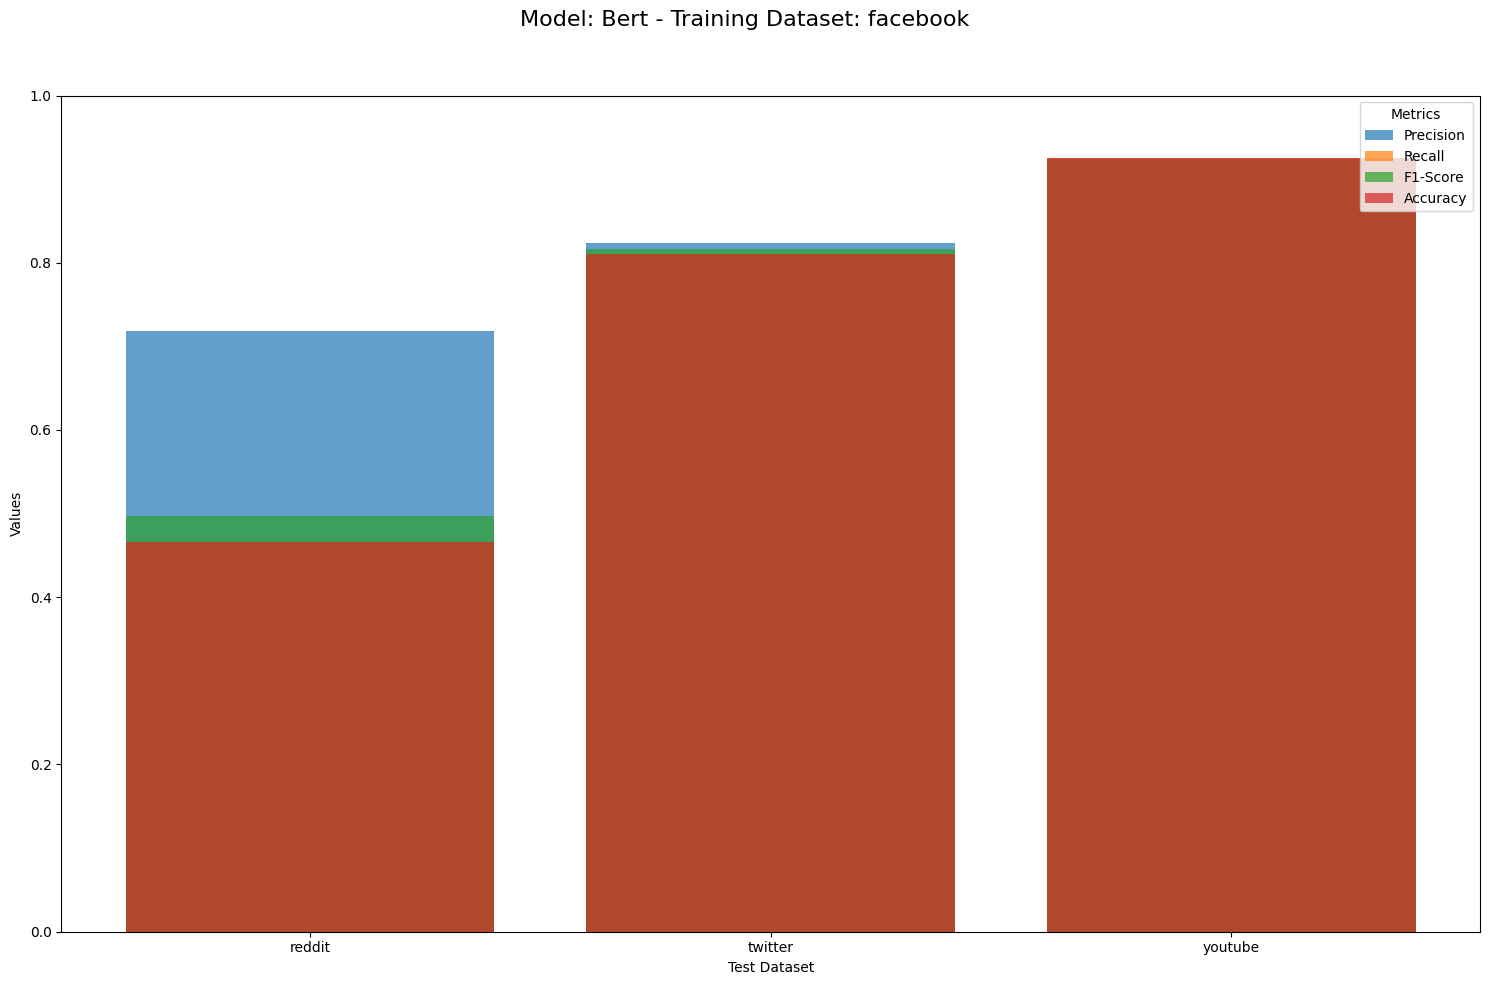

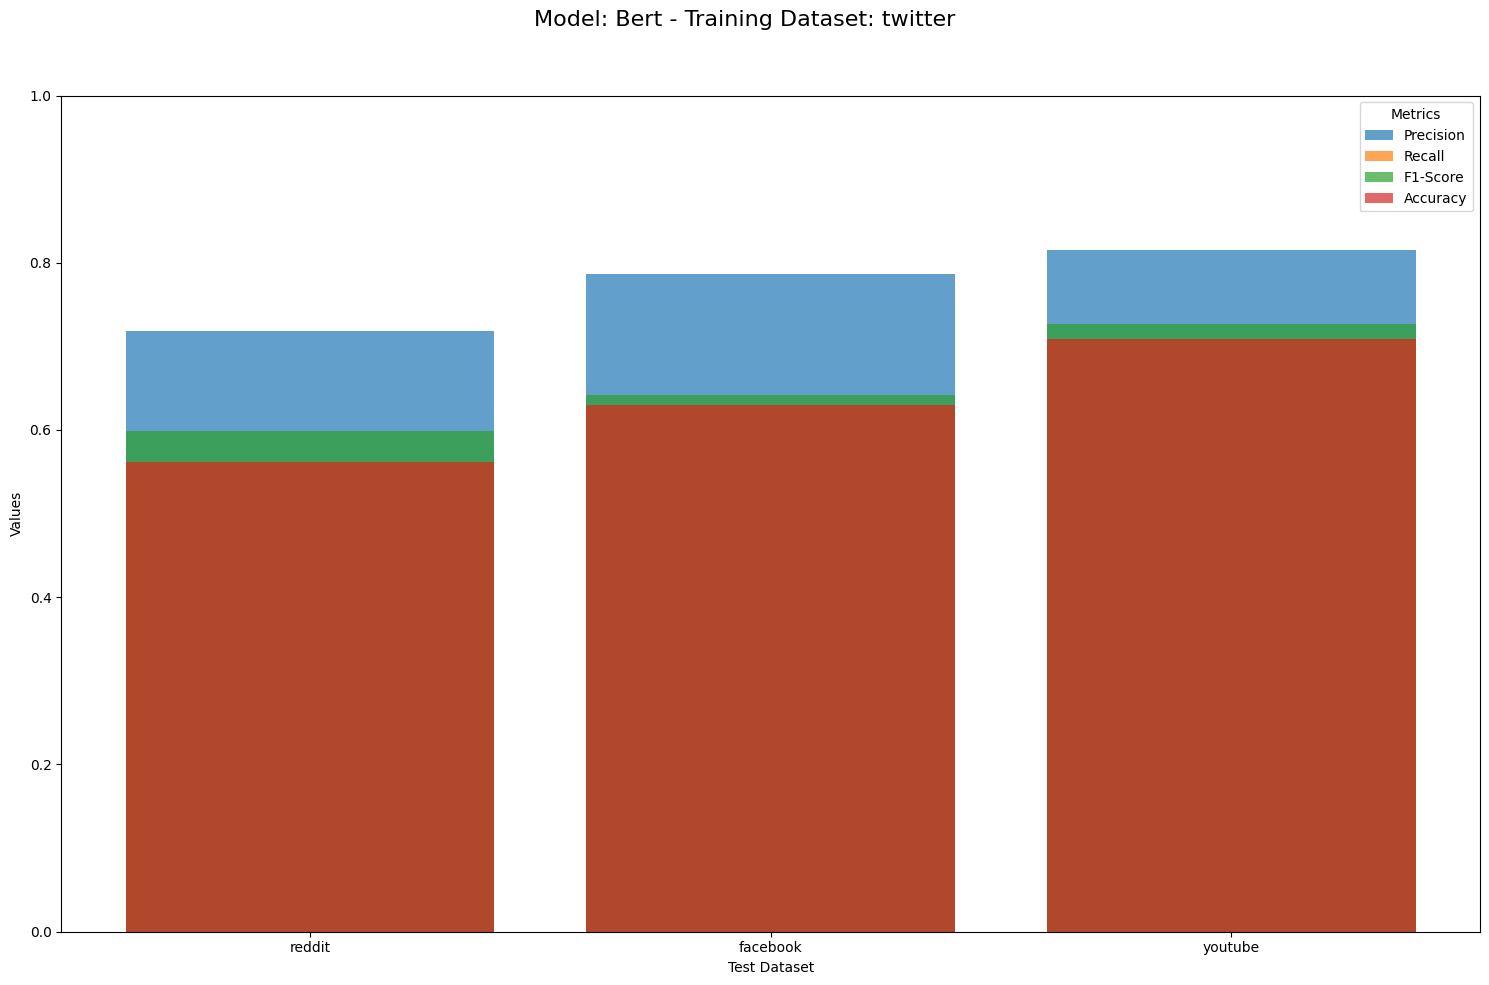

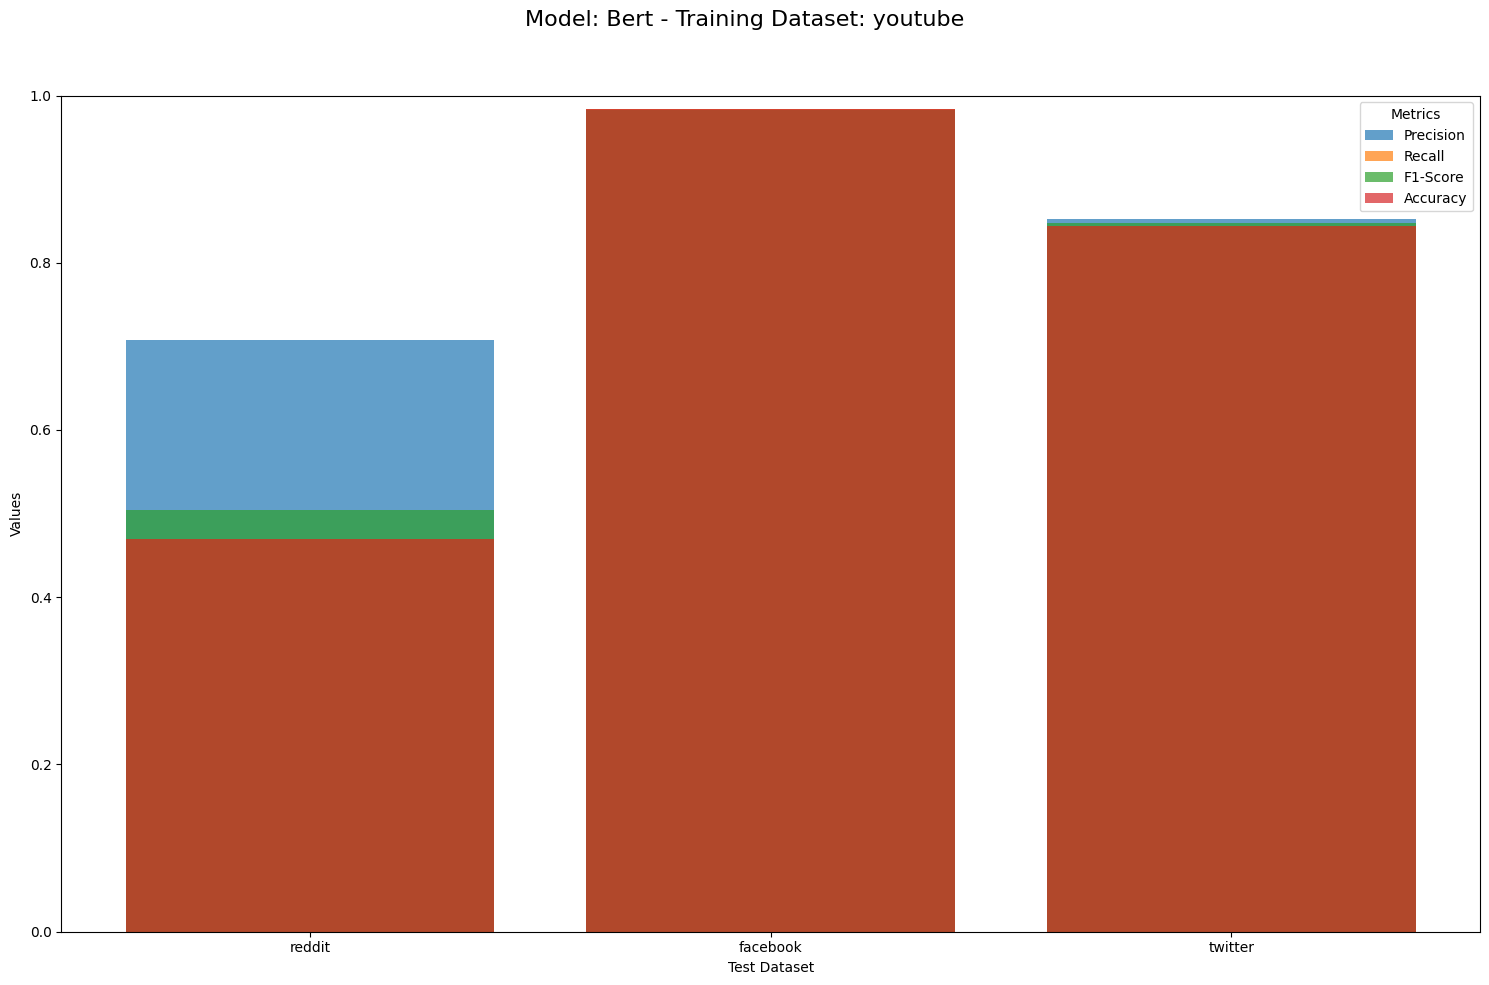

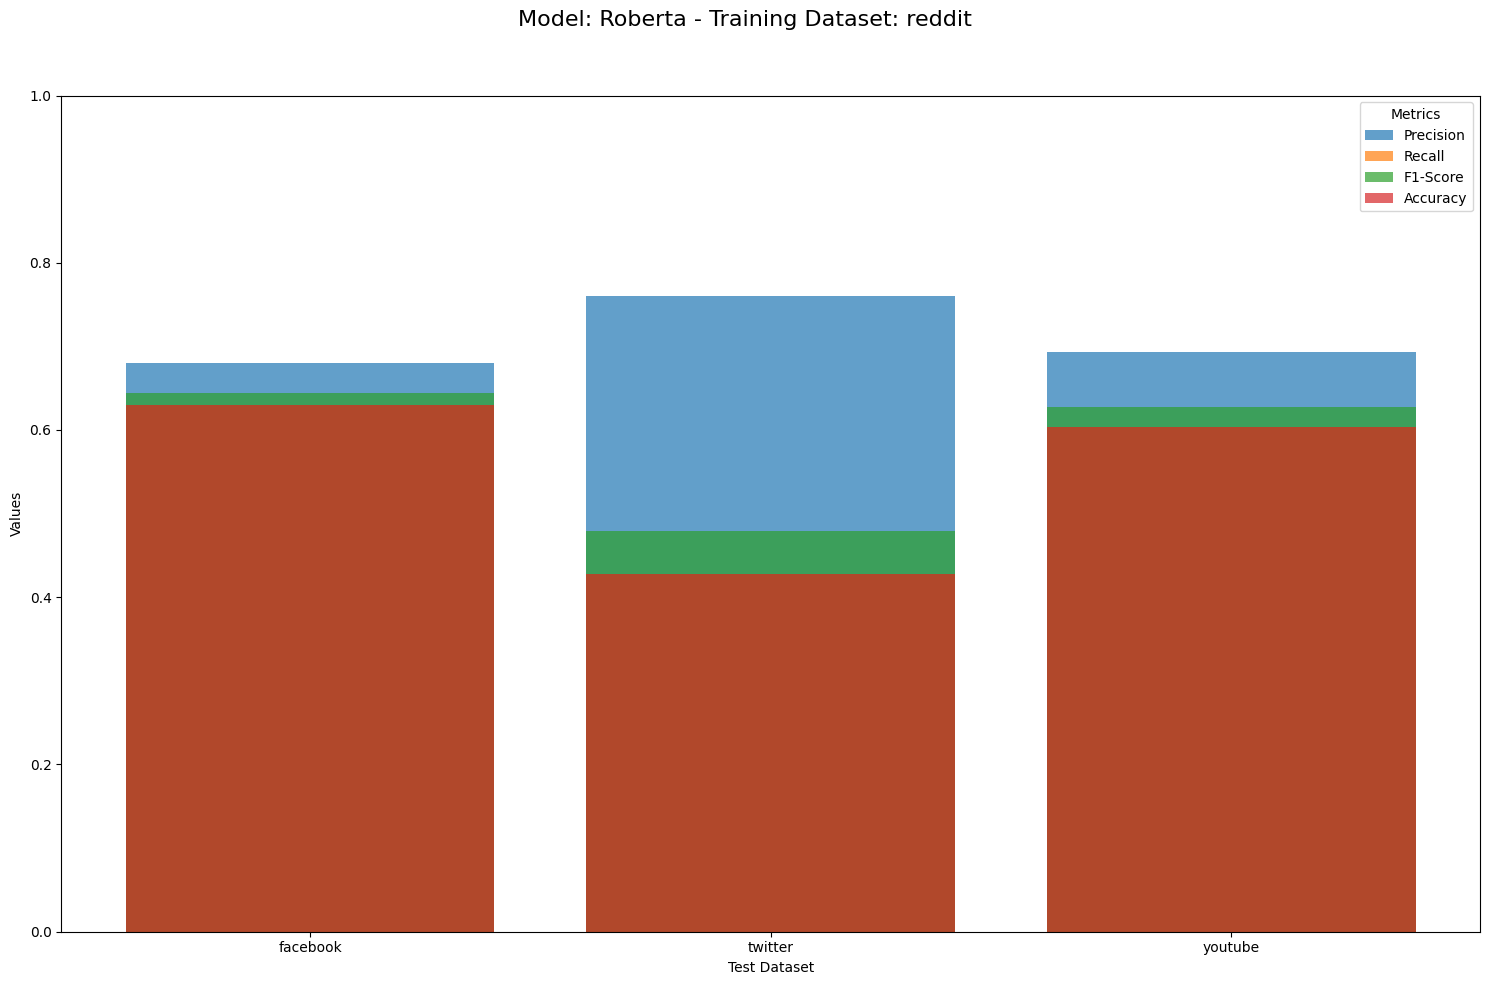

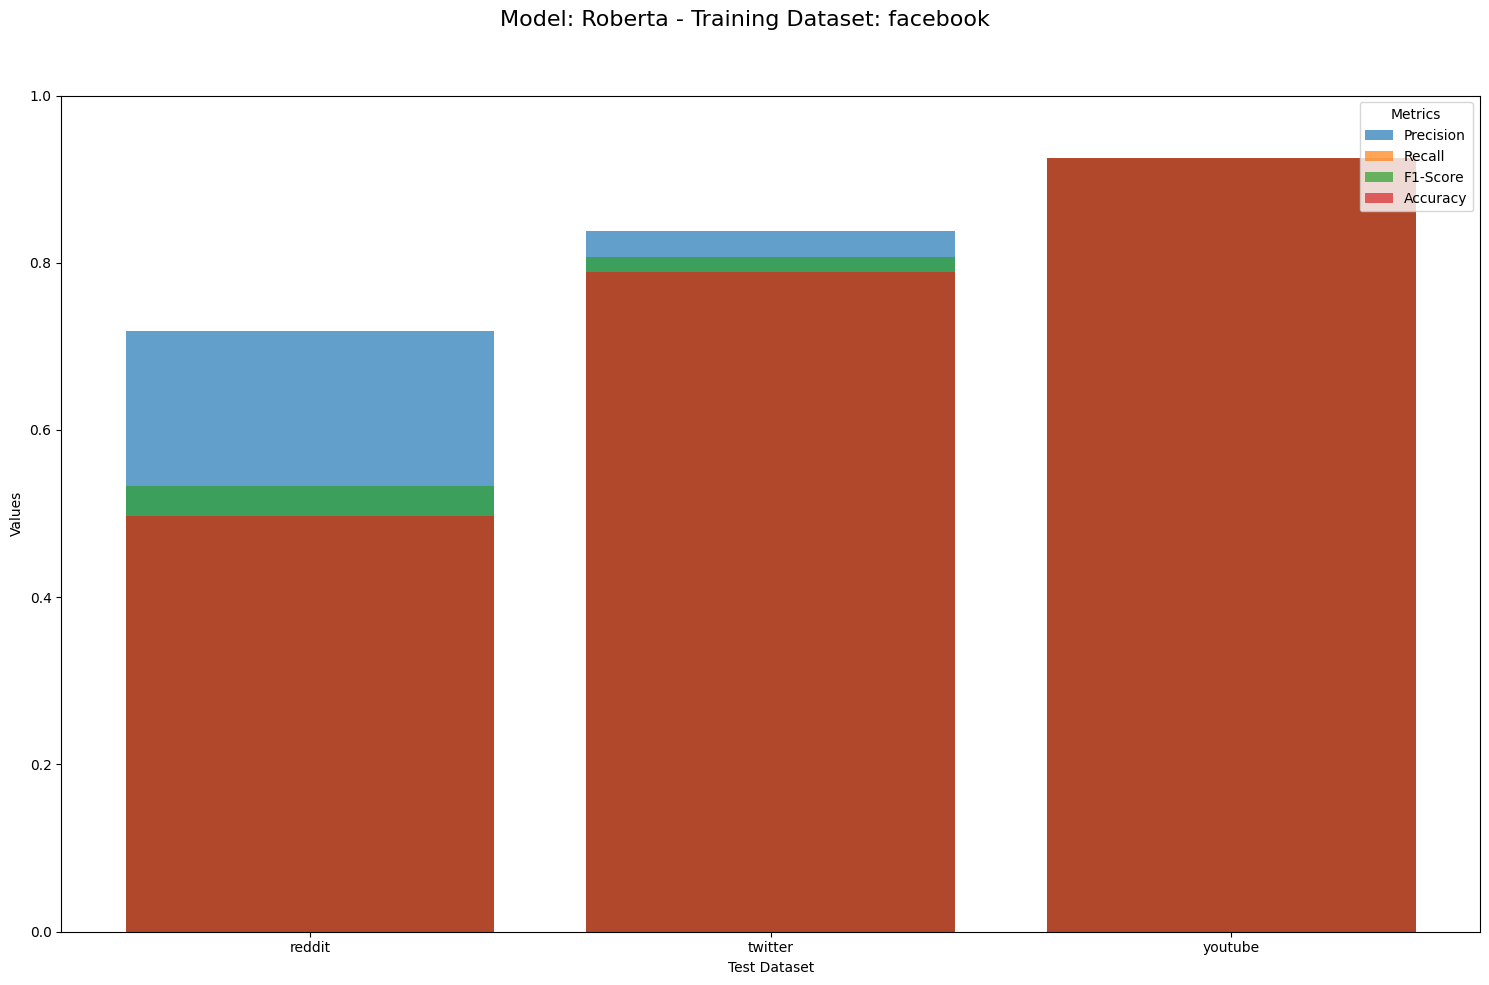

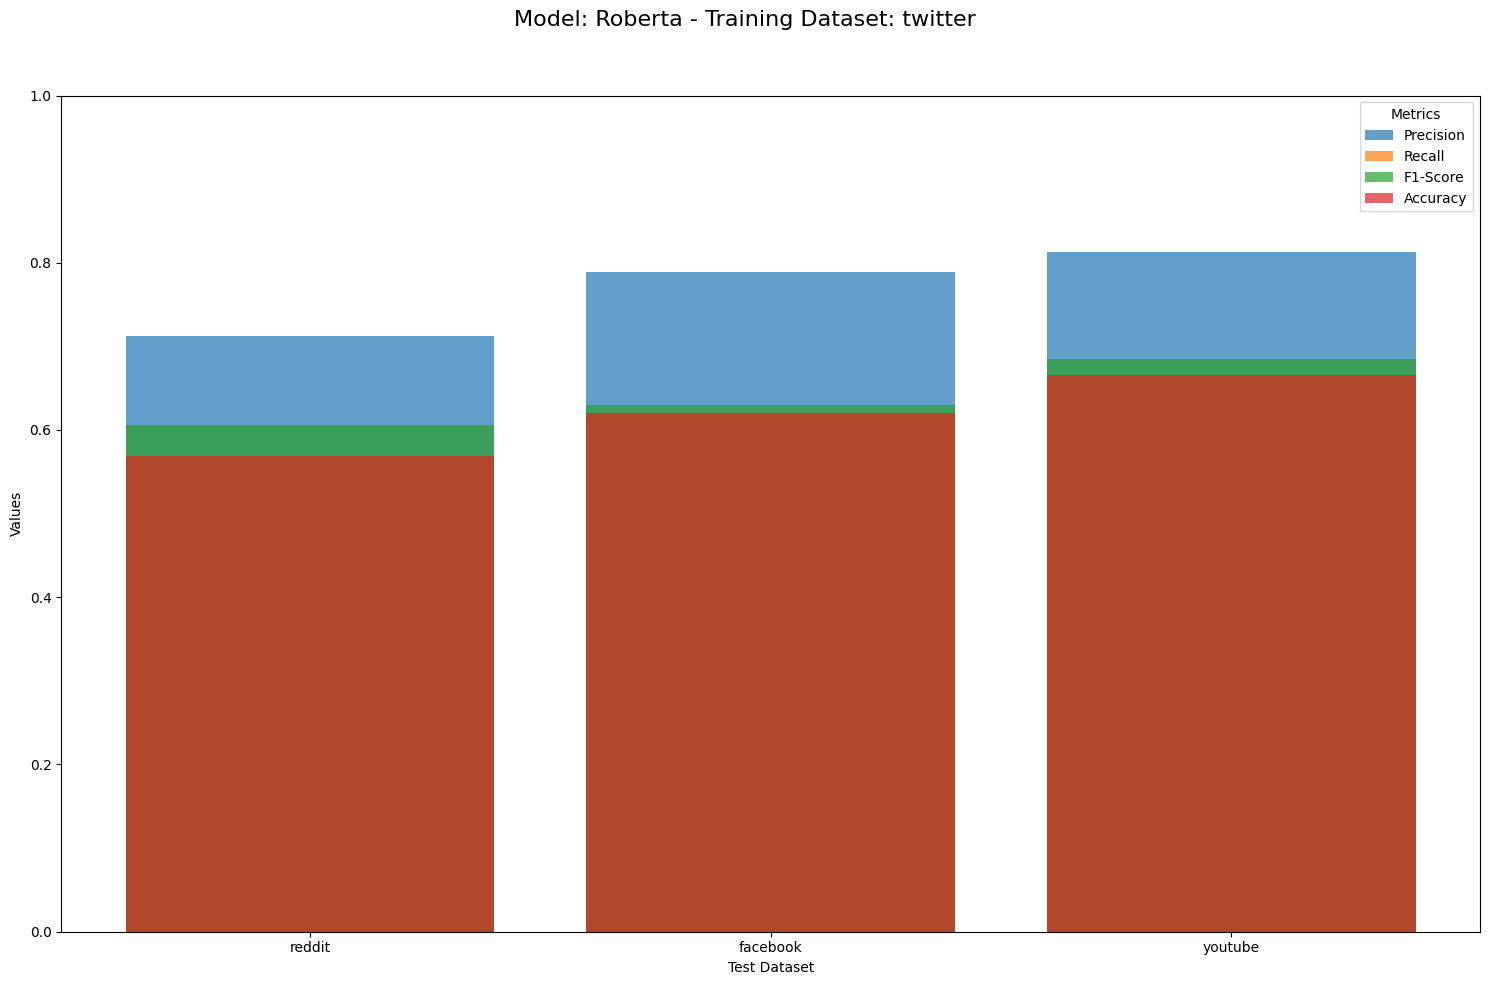

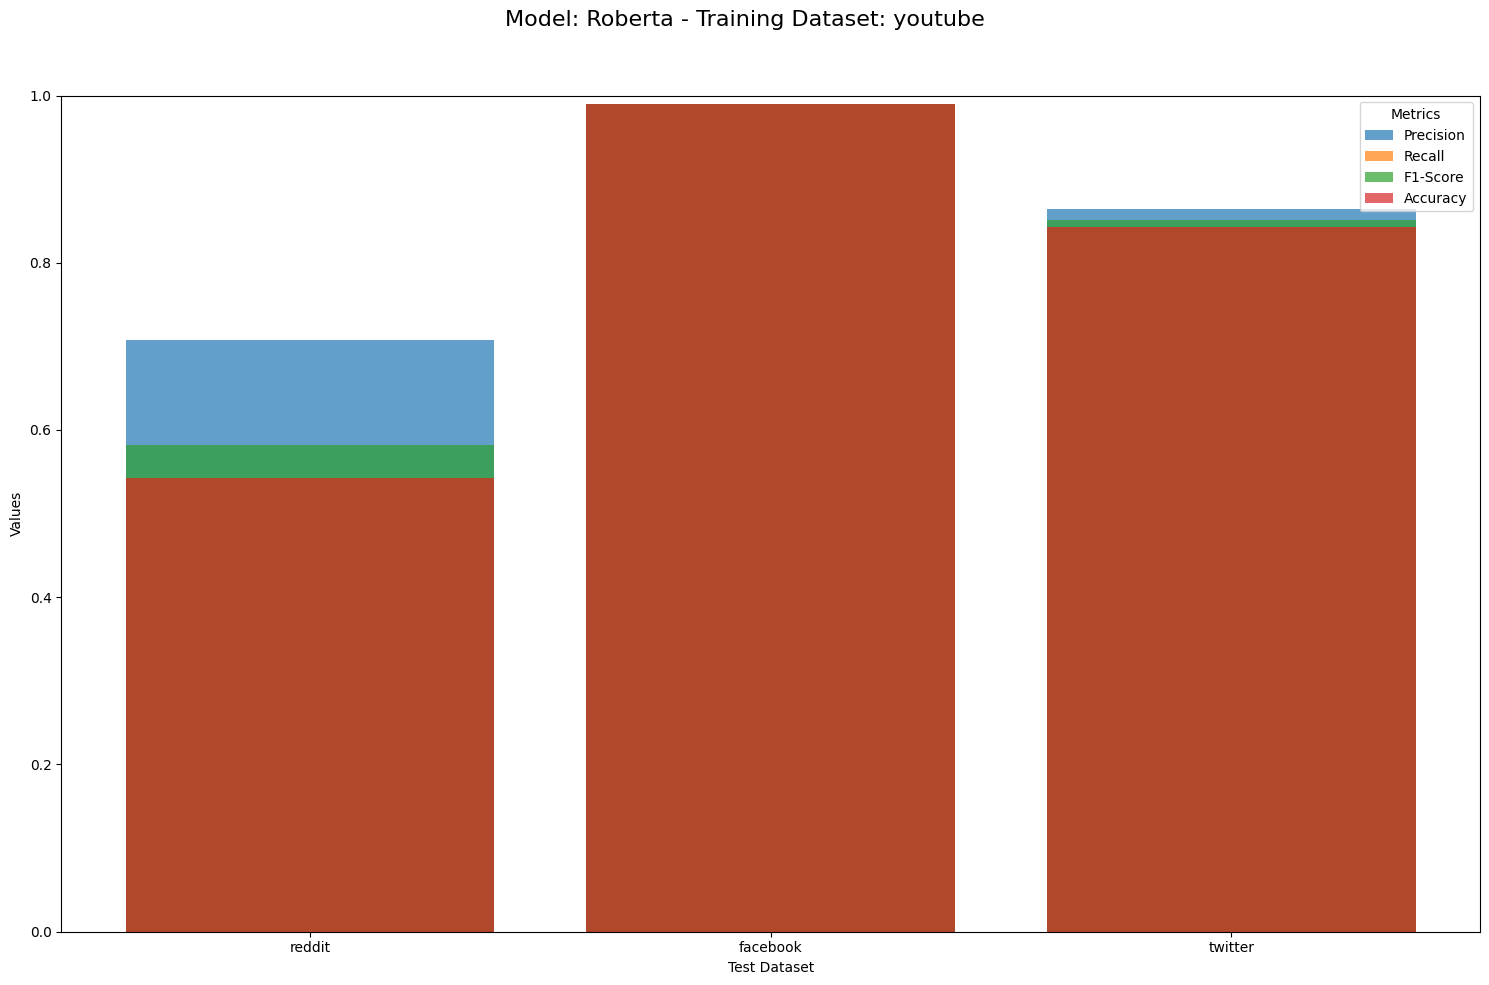

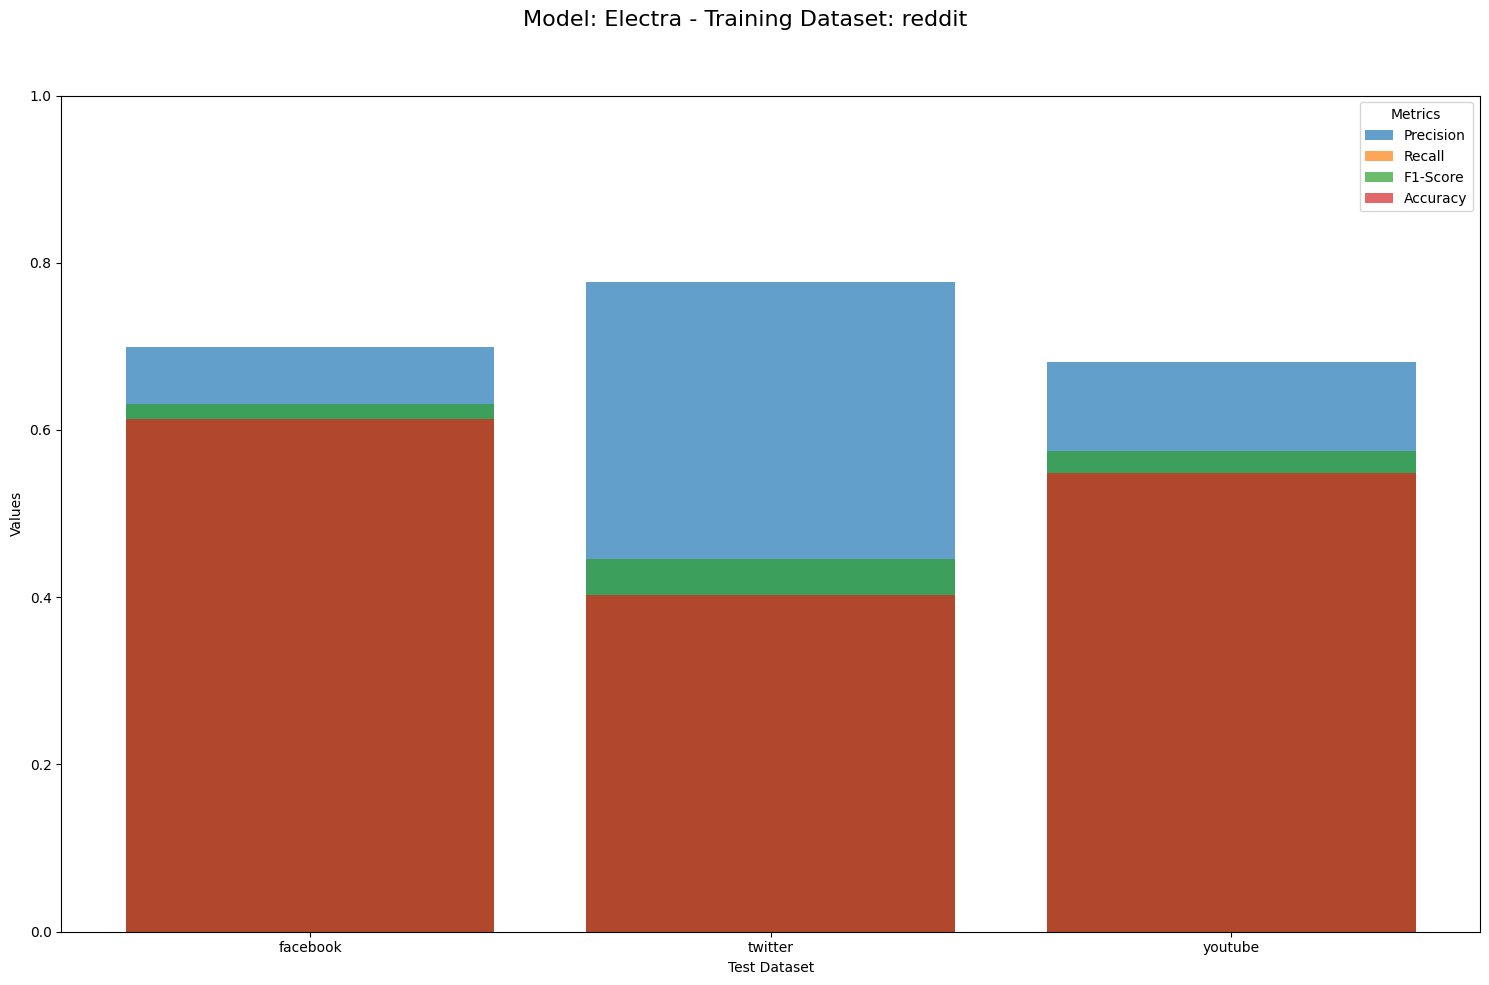

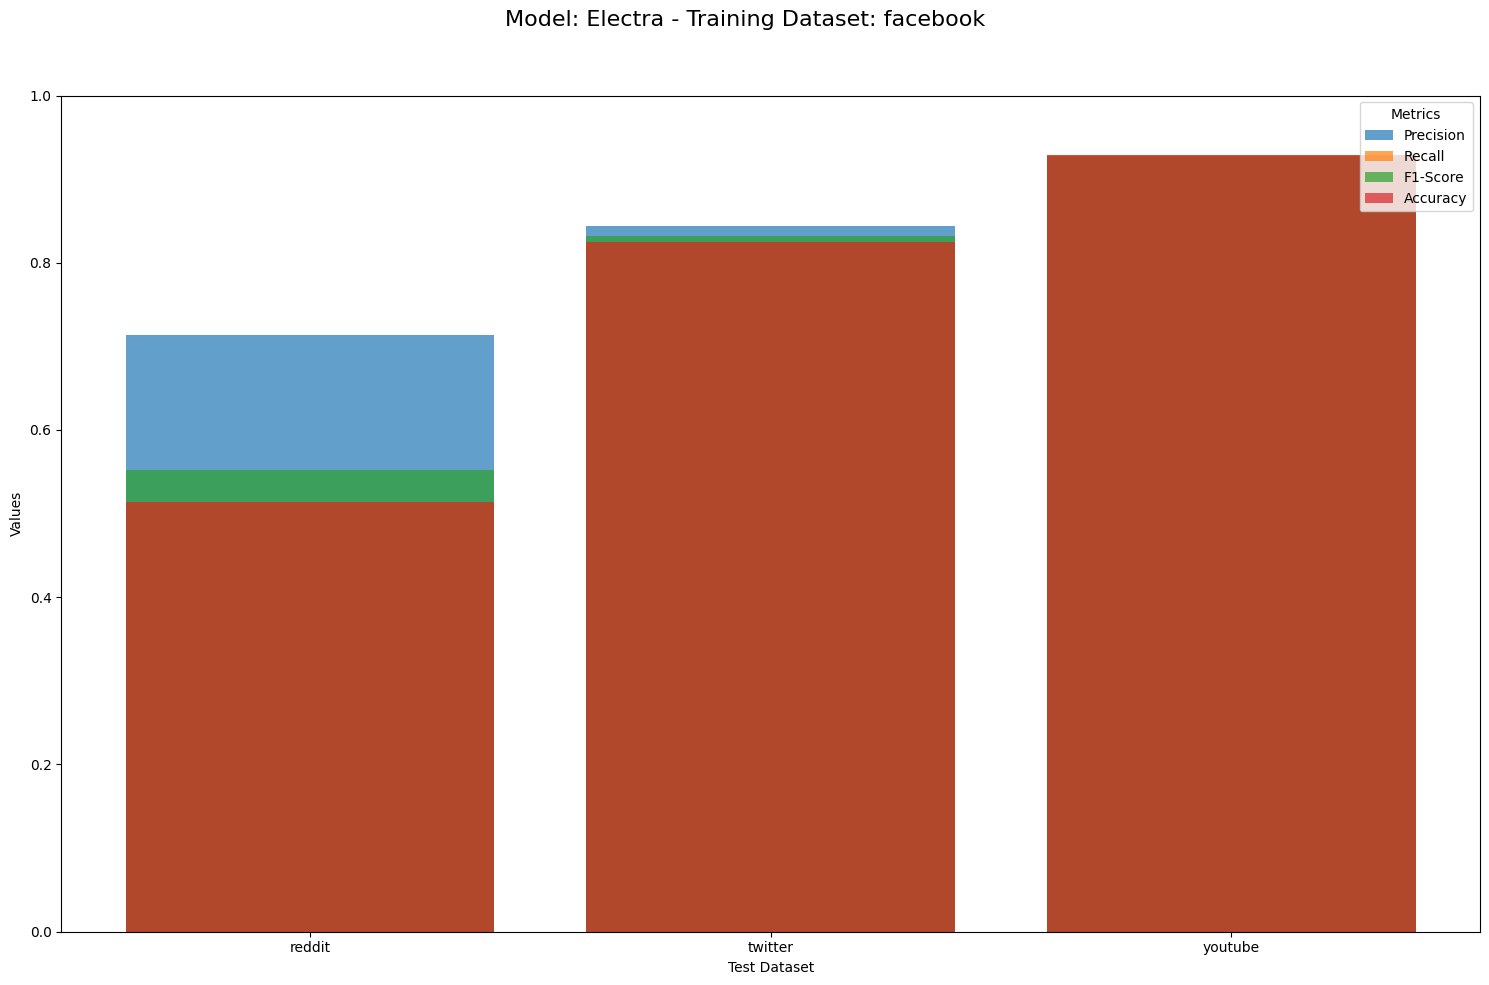

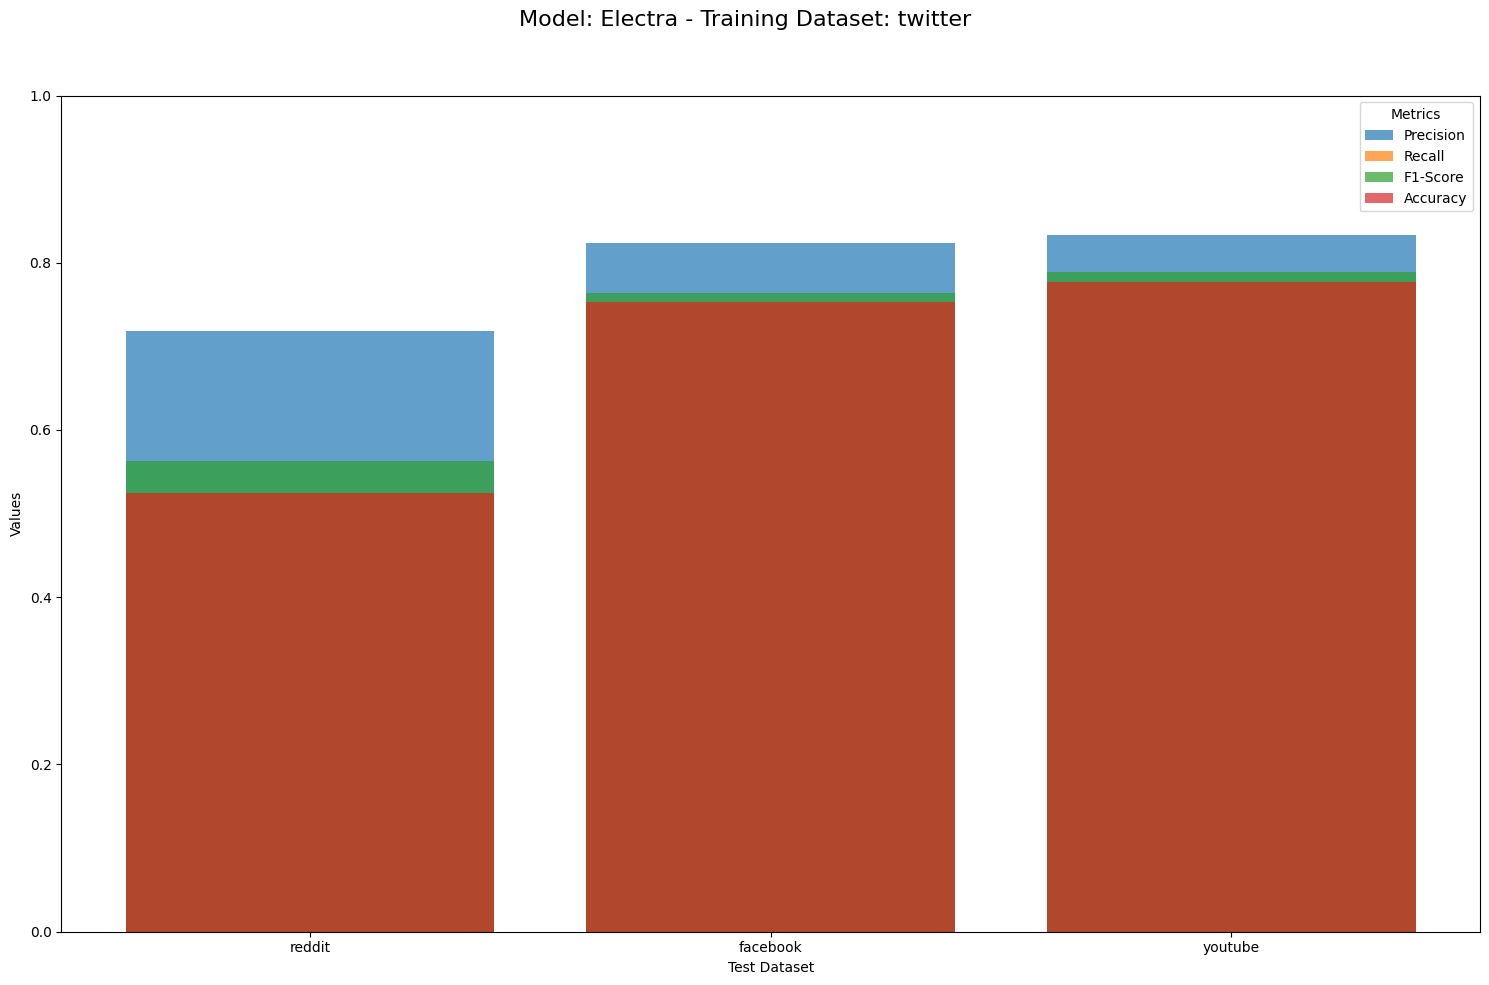

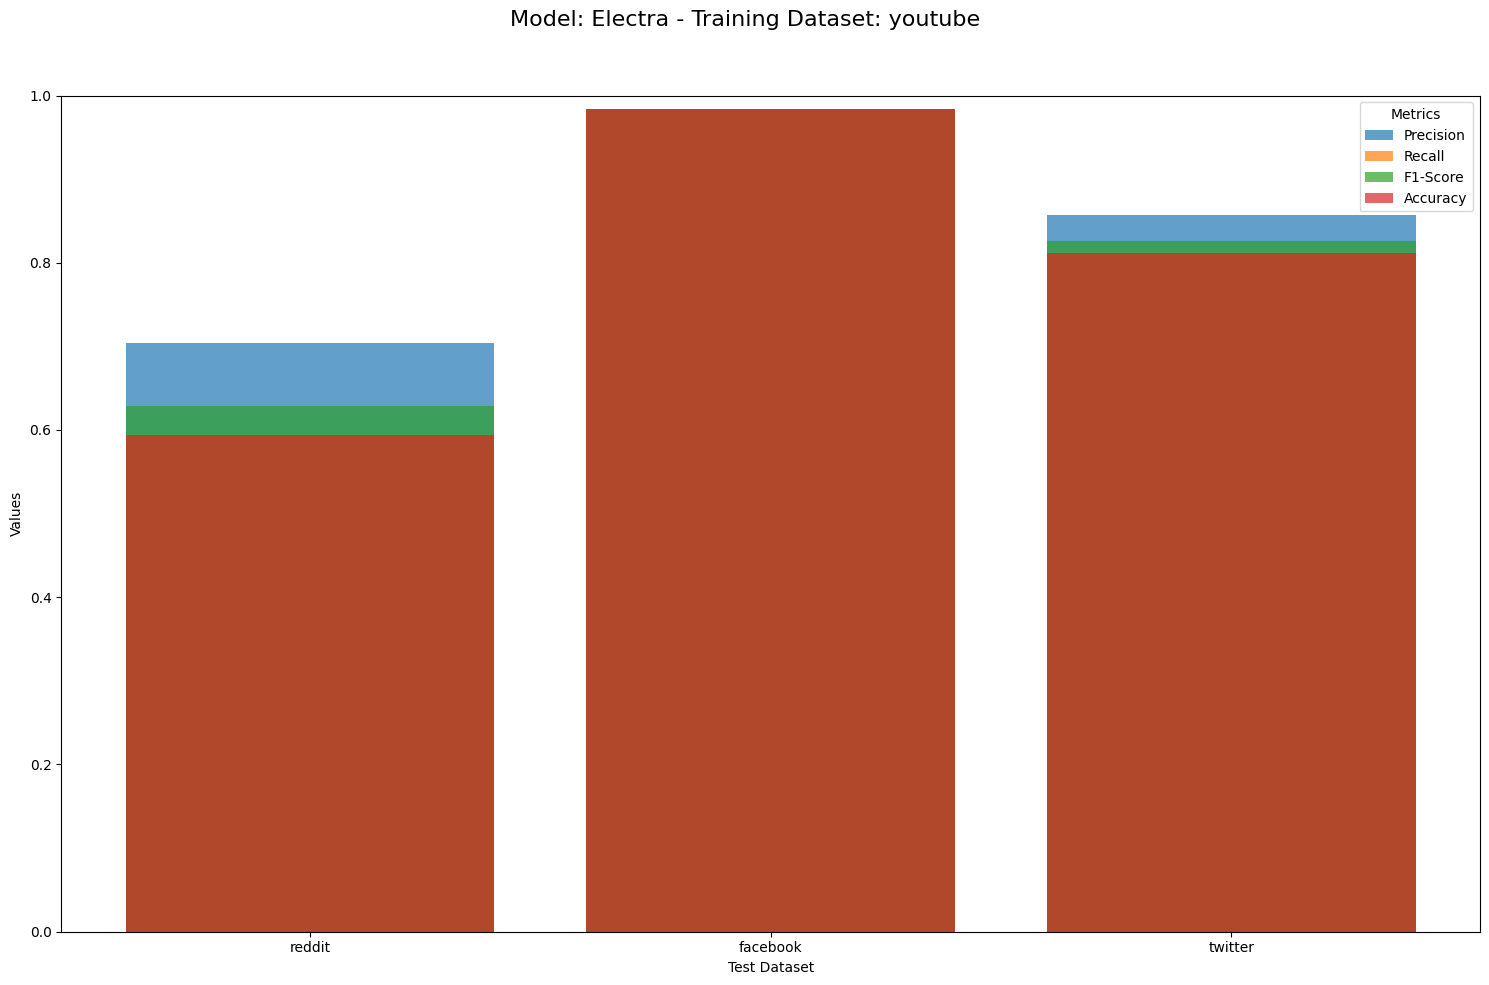

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# List of models and social media datasets
models = ['Bert', 'Roberta', 'Electra']
platforms = ['reddit', 'facebook', 'twitter', 'youtube']

# Metrics to plot in the desired order
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Function to load and process CSV files for a given model and training dataset
def load_results(model, train_dataset):
    filename_pattern = f'{model.lower()}_results_{train_dataset}.csv'
    df = pd.read_csv(filename_pattern)

    # Standardize column names to lowercase
    df.columns = [col.lower() for col in df.columns]

    # Initialize results dictionary
    results = {platform: [] for platform in platforms if platform != train_dataset}

    for column in results.keys():
        for index, row in df.iterrows():
            if row['unnamed: 0'] == 'weighted avg':
                metric_dict = json.loads(row[column].replace("'", "\""))
                results[column].append({
                    'Metric': 'Weighted Avg',
                    'Precision': metric_dict['precision'],
                    'Recall': metric_dict['recall'],
                    'F1-Score': metric_dict['f1-score']
                })
            elif row['unnamed: 0'] == 'accuracy':
                results[column].append({
                    'Metric': 'Accuracy',
                    'Accuracy': float(row[column])
                })
    return results

def plot_metrics(dataframes, model):
    for train_dataset, df in dataframes.items():
        # Create a DataFrame for plotting
        plot_data = []
        for test_dataset, metrics in df.items():
            for metric in metrics:
                # Ensure we are only handling dict-like structures
                if isinstance(metric, dict):
                    # Adding a 'Test Dataset' column for plotting
                    metric['Test Dataset'] = test_dataset
                    plot_data.append(metric)
        
        plot_df = pd.DataFrame(plot_data)

        # Create a combined plot
        fig, ax = plt.subplots(figsize=(15, 10))
        fig.suptitle(f'Model: {model} - Training Dataset: {train_dataset}', fontsize=16)

        # Define metrics to plot
        plot_metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

        # Plot each metric
        for metric_name in plot_metrics:
            if metric_name in plot_df.columns:
                ax.bar(plot_df['Test Dataset'], plot_df[metric_name], label=metric_name, alpha=0.7)
        
        ax.set_xlabel('Test Dataset')
        ax.set_ylabel('Values')
        ax.set_ylim(0, 1)
        ax.legend(loc='upper right', title='Metrics')

        # Adjust the layout
        fig.tight_layout(rect=[0, 0, 1, 0.95])
        
    # Show the plots
    plt.show()
# Main logic to load data and plot for each model and training dataset
for model in models:
    dataframes = {train_dataset: load_results(model, train_dataset) for train_dataset in platforms}
    plot_metrics(dataframes, model)


KeyError: 'YouTube' not found in bert_results_facebook.csv


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

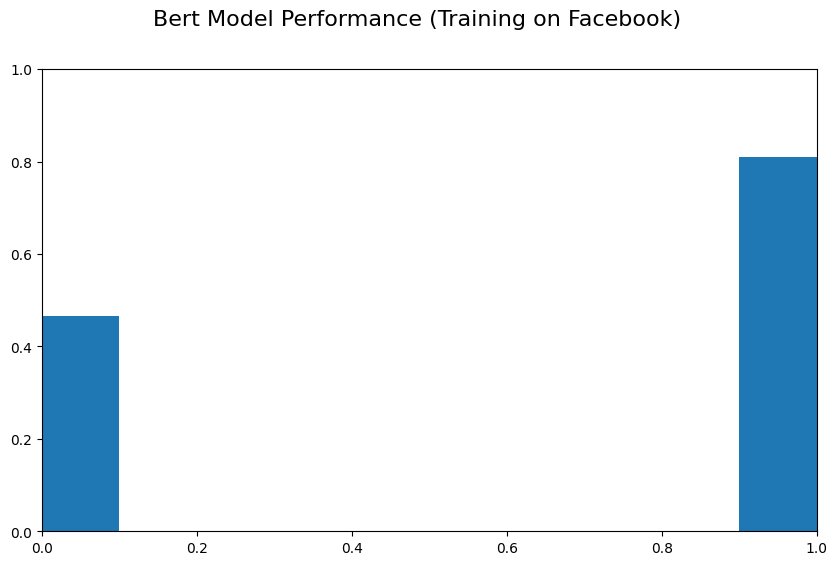

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to load and extract metrics from CSV files
def load_and_extract_metrics(model_name, training_dataset):
    file_path = f'{model_name}_results_{training_dataset}.csv'
    df = pd.read_csv(file_path)
    
    platforms = ['Facebook', 'Reddit', 'Twitter', 'YouTube']
    metrics = ['precision', 'recall', 'f1-score']

    data = {metric: {platform: [] for platform in platforms if platform.lower() != training_dataset} for metric in metrics}
    data['accuracy'] = {platform: None for platform in platforms if platform.lower() != training_dataset}

    for platform in platforms:
        if platform.lower() == training_dataset:
            continue
        try:
            for i, row in df.iterrows():
                if i == 2:
                    data['accuracy'][platform] = float(row[platform])
                elif i in [0, 1]:
                    continue
                else:
                    metric_name = row['Unnamed: 0']
                    for metric in metrics:
                        data[metric][platform].append(eval(row[platform])[metric])
        except KeyError:
            print(f"KeyError: '{platform}' not found in {file_path}")
            continue

    return data

# Function to plot metrics for a given training dataset
def plot_metrics(metrics, model_name, training_dataset):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'{model_name} Model Performance (Training on {training_dataset})', fontsize=16)

    platforms = list(metrics['accuracy'].keys())
    accuracy = [metrics['accuracy'][platform] for platform in platforms]
    precision = [sum(metrics['precision'][platform])/len(metrics['precision'][platform]) if metrics['precision'][platform] else 0 for platform in platforms]
    recall = [sum(metrics['recall'][platform])/len(metrics['recall'][platform]) if metrics['recall'][platform] else 0 for platform in platforms]
    f1_score = [sum(metrics['f1-score'][platform])/len(metrics['f1-score'][platform]) if metrics['f1-score'][platform] else 0 for platform in platforms]

    width = 0.2
    x = range(len(platforms))

    ax.bar(x, accuracy, width=width, label='Accuracy', align='center')
    ax.bar([p + width for p in x], precision, width=width, label='Precision', align='center')
    ax.bar([p + width*2 for p in x], recall, width=width, label='Recall', align='center')
    ax.bar([p + width*3 for p in x], f1_score, width=width, label='F1-Score', align='center')

    ax.set_xlabel('Test Dataset')
    ax.set_ylabel('Scores')
    ax.set_title(f'Overall Scores by Test Dataset for {model_name.capitalize()} (Training on {training_dataset.capitalize()})')
    ax.set_xticks([p + 1.5 * width for p in x])
    ax.set_xticklabels(platforms)
    ax.set_ylim([0, 1])
    ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# List of models and training datasets
models = ['bert', 'roberta', 'electra']
training_datasets = ['facebook', 'reddit', 'twitter', 'youtube']

# Generate plots for each model and training dataset
for model in models:
    for training_dataset in training_datasets:
        try:
            metrics = load_and_extract_metrics(model, training_dataset)
            plot_metrics(metrics, model.capitalize(), training_dataset.capitalize())
        except FileNotFoundError:
            print(f"File not found: {model}_results_{training_dataset}.csv")
